
# <span style="color:rgb(213,80,0)">exercise3\_noise\_filtering\_tiger.m</span>

Exercise 3 – Noise Filtering on tiger.mat

<pre>
1) Gaussian noise (SNR = 15 dB)  → mean & median filters
2) Impulse noise  (20%)          → mean & median filters
3) Combined noise (both types)   → mean→median and median→mean sequences
</pre>

Author: ANGELOS NIKOLAOS POTAMIANOS Date : MAY 2025


In [1]:
clear; close all; clc;

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\- PARAMETERS \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [2]:
data_path = fullfile('Images','Ασκηση 3','tiger.mat');   % .mat image
SNRdB     = 15;            % Target SNR for Gaussian noise
impulse_p = 0.20;          % 20% salt-and-pepper noise
meanK     = 3;             % kernel size (must be odd)

## \-\-\-\-\-\-\-\-\- Load image \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [3]:
fprintf('Loading image from %s...\n', data_path);

Loading image from Images\Ασκηση 3	iger.mat...

In [4]:
d   = load(data_path);
fns = fieldnames(d);       % Get field name dynamically
I   = d.(fns{1});          % Access via variable name
I   = double(I);

% Scale to [0,255] if needed
if max(I(:)) <= 1
    I = I * 255;
end
Imax   = 255;
isColor = (ndims(I)==3 && size(I,3)==3);

if isColor
    fprintf('Loaded color image of size %d x %d\n', size(I,1), size(I,2));
else
    fprintf('Loaded grayscale image of size %d x %d\n', size(I,1), size(I,2));
end

Loaded grayscale image of size 256 x 256

## \-\-\-\-\-\-\-\-\- Helper functions \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

In [5]:
mse_fun  = @(X,Y) mean((X(:)-Y(:)).^2);
psnr_fun = @(X,Y) 10*log10(Imax^2 / mse_fun(X,Y));

% Moving-average kernel & filters
h = ones(meanK) / meanK^2;
if isColor
    mean_filter = @(img) cat(3, ...
        imfilter(img(:,:,1), h, 'replicate'), ...
        imfilter(img(:,:,2), h, 'replicate'), ...
        imfilter(img(:,:,3), h, 'replicate'));
    med_filter  = @(img) cat(3, ...
        medfilt2(img(:,:,1), [meanK meanK]), ...
        medfilt2(img(:,:,2), [meanK meanK]), ...
        medfilt2(img(:,:,3), [meanK meanK]));
else
    mean_filter = @(img) imfilter(img, h, 'replicate');
    med_filter  = @(img) medfilt2(img, [meanK meanK]);
end

## ========= CASE 1 : Gaussian noise ============================

In [6]:
fprintf('\n--- CASE 1 : Gaussian noise (SNR %d dB) ---\n', SNRdB);

--- CASE 1 : Gaussian noise (SNR 15 dB) ---

In [7]:

% Calculate noise variance to achieve target SNR
signal_power = var(I(:));
noise_var    = signal_power / 10^(SNRdB/10);
fprintf('Signal power: %.2f, Noise variance: %.2f\n', signal_power, noise_var);

Signal power: 4599.36, Noise variance: 145.44

In [8]:

% Add Gaussian noise
rng(42); % For reproducibility
noise = sqrt(noise_var).*randn(size(I));
I_gauss = I + noise;
I_gauss = min(max(I_gauss,0), Imax);  % Clip to valid range

% Verify actual SNR
actual_SNR = 10*log10(var(I(:))/var(noise(:)));
fprintf('Actual SNR: %.2f dB\n', actual_SNR);

Actual SNR: 14.98 dB

In [9]:

% Apply filters
I_gauss_mean = mean_filter(I_gauss);
I_gauss_med  = med_filter(I_gauss);

% Calculate metrics
mse_gauss = mse_fun(I, I_gauss);
psnr_gauss = psnr_fun(I, I_gauss);

mse_gauss_mean = mse_fun(I, I_gauss_mean);
psnr_gauss_mean = psnr_fun(I, I_gauss_mean);

mse_gauss_med = mse_fun(I, I_gauss_med);
psnr_gauss_med = psnr_fun(I, I_gauss_med);

% Display results in table format
fprintf('+-----------------+--------+-----------+\n');

+-----------------+--------+-----------+

In [10]:
fprintf('| Filter          | MSE    | PSNR (dB) |\n');

| Filter          | MSE    | PSNR (dB) |

In [11]:
fprintf('+-----------------+--------+-----------+\n');

+-----------------+--------+-----------+

In [12]:
fprintf('| Noisy image     | %6.2f | %9.2f |\n', mse_gauss, psnr_gauss);

| Noisy image     | 138.61 |     26.71 |

In [13]:
fprintf('| Mean filter     | %6.2f | %9.2f |\n', mse_gauss_mean, psnr_gauss_mean);

| Mean filter     | 395.47 |     22.16 |

In [14]:
fprintf('| Median filter   | %6.2f | %9.2f |\n', mse_gauss_med, psnr_gauss_med);

| Median filter   | 322.90 |     23.04 |

In [15]:
fprintf('+-----------------+--------+-----------+\n');

+-----------------+--------+-----------+

In [16]:
fprintf('Improvement: Mean filter: %.2f dB, Median filter: %.2f dB\n',psnr_gauss_mean - psnr_gauss, psnr_gauss_med - psnr_gauss);

Improvement: Mean filter: -4.55 dB, Median filter: -3.67 dB

## ========= CASE 2 : Impulse noise =============================

In [17]:
fprintf('\n--- CASE 2 : %d%% salt & pepper noise ---\n', impulse_p*100);

--- CASE 2 : 20% salt & pepper noise ---

In [18]:

% Add impulse noise
rng(42); % For reproducibility
I_imp = double(imnoise(uint8(I), 'salt & pepper', impulse_p));

% Apply filters
I_imp_mean = mean_filter(I_imp);
I_imp_med  = med_filter(I_imp);

% Calculate metrics
mse_imp = mse_fun(I, I_imp);
psnr_imp = psnr_fun(I, I_imp);

mse_imp_mean = mse_fun(I, I_imp_mean);
psnr_imp_mean = psnr_fun(I, I_imp_mean);

mse_imp_med = mse_fun(I, I_imp_med);
psnr_imp_med = psnr_fun(I, I_imp_med);

% Display results in table format
fprintf('+-----------------+--------+-----------+\n');

+-----------------+--------+-----------+

In [19]:
fprintf('| Filter          | MSE    | PSNR (dB) |\n');

| Filter          | MSE    | PSNR (dB) |

In [20]:
fprintf('+-----------------+--------+-----------+\n');

+-----------------+--------+-----------+

In [21]:
fprintf('| Noisy image     | %6.2f | %9.2f |\n', mse_imp, psnr_imp);

| Noisy image     | 4523.69 |     11.58 |

In [22]:
fprintf('| Mean filter     | %6.2f | %9.2f |\n', mse_imp_mean, psnr_imp_mean);

| Mean filter     | 1210.85 |     17.30 |

In [23]:
fprintf('| Median filter   | %6.2f | %9.2f |\n', mse_imp_med, psnr_imp_med);

| Median filter   | 583.10 |     20.47 |

In [24]:
fprintf('+-----------------+--------+-----------+\n');

+-----------------+--------+-----------+

In [25]:
fprintf('Improvement: Mean filter: %.2f dB, Median filter: %.2f dB\n', psnr_imp_mean - psnr_imp, psnr_imp_med - psnr_imp);

Improvement: Mean filter: 5.72 dB, Median filter: 8.90 dB

## ======== CASE 3 : Gaussian + Impulse noise ======================

In [26]:
fprintf('\n--- CASE 3 : Gaussian (%d dB) + %d%% impulse ---\n', SNRdB, impulse_p*100);

--- CASE 3 : Gaussian (15 dB) + 20% impulse ---

In [27]:

% Add combined noise (Gaussian followed by impulse)
I_combo = double(imnoise(uint8(I_gauss), 'salt & pepper', impulse_p));

% Apply individual filters for comparison
I_combo_mean = mean_filter(I_combo);
I_combo_med = med_filter(I_combo);

% Apply filter sequences in both orders
I_mm = med_filter(mean_filter(I_combo));  % mean → median
I_mM = mean_filter(med_filter(I_combo));  % median → mean

% Calculate metrics
mse_combo = mse_fun(I, I_combo);
psnr_combo = psnr_fun(I, I_combo);

mse_combo_mean = mse_fun(I, I_combo_mean);
psnr_combo_mean = psnr_fun(I, I_combo_mean);

mse_combo_med = mse_fun(I, I_combo_med);
psnr_combo_med = psnr_fun(I, I_combo_med);

mse_mm = mse_fun(I, I_mm);
psnr_mm = psnr_fun(I, I_mm);

mse_mM = mse_fun(I, I_mM);
psnr_mM = psnr_fun(I, I_mM);

% Display results in table format
fprintf('+------------------+--------+-----------+\n');

+------------------+--------+-----------+

In [28]:
fprintf('| Filter           | MSE    | PSNR (dB) |\n');

| Filter           | MSE    | PSNR (dB) |

In [29]:
fprintf('+------------------+--------+-----------+\n');

+------------------+--------+-----------+

In [30]:
fprintf('| Noisy image      | %6.2f | %9.2f |\n', mse_combo, psnr_combo);

| Noisy image      | 4643.99 |     11.46 |

In [31]:
fprintf('| Mean only        | %6.2f | %9.2f |\n', mse_combo_mean, psnr_combo_mean);

| Mean only        | 1239.55 |     17.20 |

In [32]:
fprintf('| Median only      | %6.2f | %9.2f |\n', mse_combo_med, psnr_combo_med);

| Median only      | 617.89 |     20.22 |

In [33]:
fprintf('| Mean → Median    | %6.2f | %9.2f |\n', mse_mm, psnr_mm);

| Mean → Median    | 1257.11 |     17.14 |

In [34]:
fprintf('| Median → Mean    | %6.2f | %9.2f |\n', mse_mM, psnr_mM);

| Median → Mean    | 717.44 |     19.57 |

In [35]:
fprintf('+------------------+--------+-----------+\n');

+------------------+--------+-----------+

In [36]:

% Find best method
[best_psnr, best_idx] = max([psnr_combo_mean, psnr_combo_med, psnr_mm, psnr_mM]);
methods = {'Mean only', 'Median only', 'Mean → Median', 'Median → Mean'};
fprintf('Best method: %s (PSNR: %.2f dB)\n', methods{best_idx}, best_psnr);

Best method: Median only (PSNR: 20.22 dB)

In [37]:
fprintf('Improvement over noisy image: %.2f dB\n', best_psnr - psnr_combo);

Improvement over noisy image: 8.76 dB

## \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\- Display results \-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-\-

Create a comprehensive figure for all results



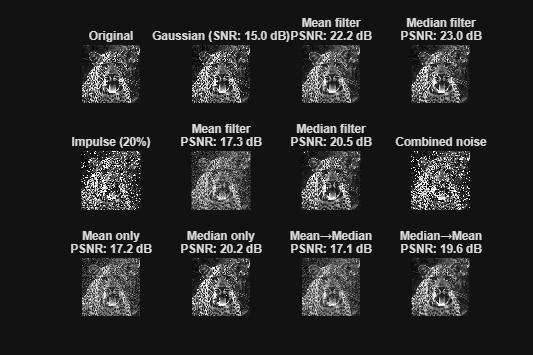

In [38]:
figure('Name', 'Noise Filtering Results', 'Position', [50, 50, 1200, 800]);

% Original image
subplot(3,4,1), imshow(uint8(I)), title('Original');

% Case 1: Gaussian
subplot(3,4,2), imshow(uint8(I_gauss)), title(sprintf('Gaussian (SNR: %.1f dB)', actual_SNR));
subplot(3,4,3), imshow(uint8(I_gauss_mean)), title(sprintf('Mean filter\nPSNR: %.1f dB', psnr_gauss_mean));
subplot(3,4,4), imshow(uint8(I_gauss_med)), title(sprintf('Median filter\nPSNR: %.1f dB', psnr_gauss_med));

% Case 2: Impulse
subplot(3,4,5), imshow(uint8(I_imp)), title(sprintf('Impulse (%.0f%%)', impulse_p*100));
subplot(3,4,6), imshow(uint8(I_imp_mean)), title(sprintf('Mean filter\nPSNR: %.1f dB', psnr_imp_mean));
subplot(3,4,7), imshow(uint8(I_imp_med)), title(sprintf('Median filter\nPSNR: %.1f dB', psnr_imp_med));

% Case 3: Combined
subplot(3,4,8), imshow(uint8(I_combo)), title('Combined noise');
subplot(3,4,9), imshow(uint8(I_combo_mean)), title(sprintf('Mean only\nPSNR: %.1f dB', psnr_combo_mean));
subplot(3,4,10), imshow(uint8(I_combo_med)), title(sprintf('Median only\nPSNR: %.1f dB', psnr_combo_med));
subplot(3,4,11), imshow(uint8(I_mm)), title(sprintf('Mean→Median\nPSNR: %.1f dB', psnr_mm));
subplot(3,4,12), imshow(uint8(I_mM)), title(sprintf('Median→Mean\nPSNR: %.1f dB', psnr_mM));


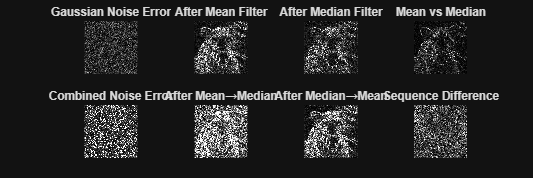

In [39]:

% Create an additional figure to highlight differences
figure('Name', 'Difference Images', 'Position', [50, 50, 1200, 400]);

% Error maps (scaled for visualization)
subplot(2,4,1), imshow(abs(I - I_gauss) / 50), title('Gaussian Noise Error');
subplot(2,4,2), imshow(abs(I - I_gauss_mean) / 50), title('After Mean Filter');
subplot(2,4,3), imshow(abs(I - I_gauss_med) / 50), title('After Median Filter');
subplot(2,4,4), imshow(abs(I_gauss_mean - I_gauss_med) / 50), title('Mean vs Median');

% Error maps for combined noise
subplot(2,4,5), imshow(abs(I - I_combo) / 50), title('Combined Noise Error');
subplot(2,4,6), imshow(abs(I - I_mm) / 50), title('After Mean→Median');
subplot(2,4,7), imshow(abs(I - I_mM) / 50), title('After Median→Mean');
subplot(2,4,8), imshow(abs(I_mm - I_mM) / 50), title('Sequence Difference');

In [40]:

fprintf('\n========== ANALYSIS ==========\n');

========== ANALYSIS ==========

In [41]:
fprintf('1. Gaussian Noise: %s is more effective\n',ternary(psnr_gauss_mean > psnr_gauss_med, 'Mean filter', 'Median filter'));

1. Gaussian Noise: Median filter is more effective

In [42]:
fprintf('2. Impulse Noise: %s is more effective\n',ternary(psnr_imp_mean > psnr_imp_med, 'Mean filter', 'Median filter'));

2. Impulse Noise: Median filter is more effective

In [43]:
fprintf('3. Combined Noise: %s provides the best results\n', methods{best_idx});

3. Combined Noise: Median only provides the best results

In [44]:
fprintf('==================================\n');

## Simple ternary operator helper

In [45]:
function result = ternary(condition, true_val, false_val)
    if condition
        result = true_val;
    else
        result = false_val;
    end
end